In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#read Data set 
Data  = pd.read_csv('/Users/shenglienlee/Desktop/RIT_Competition/Data/Raw/R2_final_hotels.csv')
Data

,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,Country,...,PreviousBookingsNotCanceled,PreviousCancellations,RepeatedGuest,ReservationStatus,ReservationStatusDate,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent
0,8/14/17,33,A,78.49,0,NaN,TA/TO,SC,0.0,BRA,...,0,0,0,Check-Out,8/21/17,A,2,4,2,9.0
1,4/24/17,17,A,113.86,0,NaN,TA/TO,BB,0.0,AUT,...,0,0,0,Check-Out,4/27/17,A,2,2,0,21.0
2,8/25/15,35,A,94.51,0,NaN,TA/TO,HB,0.0,ITA,...,0,0,0,Canceled,7/9/15,A,2,1,0,17.0
3,8/15/17,33,D,124.99,0,NaN,TA/TO,BB,0.0,CHE,...,0,0,0,Canceled,5/2/17,D,1,3,1,9.0
4,10/12/16,41,A,129.25,0,NaN,TA/TO,BB,0.0,PRT,...,0,0,0,Check-Out,10/16/16,A,0,2,2,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94359,9/18/17,38,F,190.87,1,NaN,Direct,BB,0.0,PRT,...,0,0,0,Check-Out,9/20/17,D,1,2,1,14.0
94360,9/24/17,38,A,171.88,0,NaN,TA/TO,BB,0.0,PRT,...,0,1,0,Canceled,7/23/17,A,2,1,0,1.0
94361,11/28/17,48,A,88.68,0,NaN,TA/TO,SC,0.0,NLD,...,0,0,0,Check-Out,12/29/17,A,2,2,0,9.0
94362,11/3/17,44,A,72.41,1,NaN,TA/TO,SC,0.0,AUS,...,0,0,0,Check-Out,11/5/17,A,0,1,2,8.0


# Task 1: Cancellation Analysis

In [3]:
#filter out cancellations
#label last minute cancellation(Arrivce date - canceled date <=3)  and not last minute cancellation

#Change data type to datetime
Data['ArrivalDate'] = pd.to_datetime(Data['ArrivalDate'], format='%m/%d/%y')
Data['ReservationStatusDate'] = pd.to_datetime(Data['ReservationStatusDate'], format='%m/%d/%y')

Data['days_difference'] = (Data['ArrivalDate']-Data['ReservationStatusDate']).dt.days


def Label_CancelType(row):
    #last minute cancellation #drop the record that has negative days_differnece
    if row['ReservationStatus'] == 'Canceled' and row['days_difference'] <= 3:
        return 2
    #early cancel
    elif row['ReservationStatus'] == 'Canceled'and row['days_difference'] > 3:
        return 1
    #no cancel
    else:
        return 0
Data['CancelType'] = Data.apply(Label_CancelType,axis = 1)

#Drop data cancel after arrivalDate
Data = Data.drop(Data[(Data['CancelType'] != 0) & (Data['days_difference'] < 0)].index)

#Record of Customer canceled their reservation at last minute
Data_last_min = Data[Data['CancelType']==2]
Data_last_min

,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,Country,...,RepeatedGuest,ReservationStatus,ReservationStatusDate,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent,days_difference,CancelType
81,2017-06-14,24,A,120.90,0,NaN,Direct,BB,0.0,FRA,...,0,Canceled,2017-06-12,A,2,3,0,14.0,2,2
142,2015-09-14,38,A,66.12,0,NaN,TA/TO,BB,0.0,PRT,...,0,Canceled,2015-09-13,A,0,2,1,7.0,1,2
164,2016-04-06,14,A,110.97,0,NaN,TA/TO,BB,0.0,PRT,...,0,Canceled,2016-04-05,A,0,1,0,34.0,1,2
298,2015-09-24,39,A,170.69,0,NaN,TA/TO,BB,0.0,PRT,...,0,Canceled,2015-09-21,A,2,2,0,1.0,3,2
573,2016-09-13,37,A,81.05,0,NaN,TA/TO,BB,0.0,PRT,...,0,Canceled,2016-09-13,A,0,2,0,6.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93541,2017-12-16,50,D,94.52,0,NaN,Direct,BB,0.0,PRT,...,0,Canceled,2017-12-15,D,0,4,1,14.0,1,2
93686,2017-11-27,48,A,70.40,0,NaN,TA/TO,BB,0.0,PRT,...,0,Canceled,2017-11-25,A,1,3,0,37.0,2,2
93735,2017-11-21,47,A,123.83,0,233.0,Corporate,BB,0.0,NLD,...,0,Canceled,2017-11-19,A,2,2,0,9.0,2,2
93890,2017-10-04,40,A,100.89,0,NaN,TA/TO,BB,0.0,PRT,...,0,Canceled,2017-10-04,A,0,2,0,19.0,0,2


## Loss of last minute cancellation

In [9]:
#calculate loss(not consider DepositType)
#Length of Stay
def Length_of_Stay(row):
    Total_Days = row['StaysInWeekendNights']+row['StaysInWeekNights']
    return Total_Days

def last_minute_cancellation_loss_calculation(row):
    loss_of_cancellation = (row['LengthofStay']-1) * row['AverageDailyRate']
    return loss_of_cancellation

Data_last_min['LengthofStay'] = Data_last_min.apply(Length_of_Stay,axis = 1)
Data_last_min['LastMinuteCancellationLoss'] = Data_last_min.apply(last_minute_cancellation_loss_calculation,axis = 1)
Data_last_min

/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_6425/3245997124.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_last_min['LengthofStay'] = Data_last_min.apply(Length_of_Stay,axis = 1)
/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_6425/3245997124.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_last_min['LastMinuteCancellationLoss'] = Data_last_min.apply(last_minute_cancellation_loss_calculation,axis = 1)


,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,Country,...,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent,days_difference,CancelType,LengthofStay,LastMinuteCancellationLoss,LastMinuteLossCalculation
81,2017-06-14,24,A,120.90,0,NaN,Direct,BB,0.0,FRA,...,A,2,3,0,14.0,2,2,5,483.60,604.50
142,2015-09-14,38,A,66.12,0,NaN,TA/TO,BB,0.0,PRT,...,A,0,2,1,7.0,1,2,2,66.12,132.24
164,2016-04-06,14,A,110.97,0,NaN,TA/TO,BB,0.0,PRT,...,A,0,1,0,34.0,1,2,1,0.00,0.00
298,2015-09-24,39,A,170.69,0,NaN,TA/TO,BB,0.0,PRT,...,A,2,2,0,1.0,3,2,4,512.07,0.00
573,2016-09-13,37,A,81.05,0,NaN,TA/TO,BB,0.0,PRT,...,A,0,2,0,6.0,0,2,2,81.05,162.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93541,2017-12-16,50,D,94.52,0,NaN,Direct,BB,0.0,PRT,...,D,0,4,1,14.0,1,2,4,283.56,378.08
93686,2017-11-27,48,A,70.40,0,NaN,TA/TO,BB,0.0,PRT,...,A,1,3,0,37.0,2,2,4,211.20,281.60
93735,2017-11-21,47,A,123.83,0,233.0,Corporate,BB,0.0,NLD,...,A,2,2,0,9.0,2,2,4,371.49,495.32
93890,2017-10-04,40,A,100.89,0,NaN,TA/TO,BB,0.0,PRT,...,A,0,2,0,19.0,0,2,2,100.89,201.78


In [5]:
# ##calculate loss(consider DepositType)
# def Length_of_Stay(row):
#     Total_Days = row['StaysInWeekendNights']+row['StaysInWeekNights']
#     return Total_Days

# def last_minute_cancellation_loss_calculation(row):
#     #DepositType = Non Refund
#     if row['DepositType'] == 'Non Refund':
#         loss_of_cancellation = 0
#         return loss_of_cancellation
#     #DepositType = Refundable
#     elif row['DepositType'] == 'Refundable':
#         loss_of_cancellation = (row['LengthofStay']-1) * row['AverageDailyRate']
#         return loss_of_cancellation

#     #DepositType = No Deposit
#     elif row['DepositType'] == 'No Deposit':
#         loss_of_cancellation = (row['LengthofStay']) * row['AverageDailyRate']
#         return loss_of_cancellation
    
# Data_last_min['LengthofStay'] = Data_last_min.apply(Length_of_Stay,axis = 1)
# Data_last_min['LastMinuteLossCalculation'] = Data_last_min.apply(last_minute_cancellation_loss_calculation,axis = 1)
# Data_last_min

/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_6425/1998276950.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_last_min['LengthofStay'] = Data_last_min.apply(Length_of_Stay,axis = 1)
/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_6425/1998276950.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_last_min['LastMinuteLossCalculation'] = Data_last_min.apply(last_minute_cancellation_loss_calculation,axis = 1)


,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,Country,...,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent,days_difference,CancelType,LengthofStay,LastMinuteCancellationLoss,LastMinuteLossCalculation
81,2017-06-14,24,A,120.90,0,NaN,Direct,BB,0.0,FRA,...,A,2,3,0,14.0,2,2,5,483.60,604.50
142,2015-09-14,38,A,66.12,0,NaN,TA/TO,BB,0.0,PRT,...,A,0,2,1,7.0,1,2,2,66.12,132.24
164,2016-04-06,14,A,110.97,0,NaN,TA/TO,BB,0.0,PRT,...,A,0,1,0,34.0,1,2,1,0.00,0.00
298,2015-09-24,39,A,170.69,0,NaN,TA/TO,BB,0.0,PRT,...,A,2,2,0,1.0,3,2,4,512.07,0.00
573,2016-09-13,37,A,81.05,0,NaN,TA/TO,BB,0.0,PRT,...,A,0,2,0,6.0,0,2,2,81.05,162.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93541,2017-12-16,50,D,94.52,0,NaN,Direct,BB,0.0,PRT,...,D,0,4,1,14.0,1,2,4,283.56,378.08
93686,2017-11-27,48,A,70.40,0,NaN,TA/TO,BB,0.0,PRT,...,A,1,3,0,37.0,2,2,4,211.20,281.60
93735,2017-11-21,47,A,123.83,0,233.0,Corporate,BB,0.0,NLD,...,A,2,2,0,9.0,2,2,4,371.49,495.32
93890,2017-10-04,40,A,100.89,0,NaN,TA/TO,BB,0.0,PRT,...,A,0,2,0,19.0,0,2,2,100.89,201.78


## Cancellation Data EDA

In [10]:
#create a dataframe only contain Cancel record
df_Cancellation = Data[Data['CancelType']!=0].reset_index().drop(columns = ['index','ReservationStatus'])
df_Cancellation.columns

Index(['ArrivalDate', 'ArrivalWeekNumber', 'AssignedRoom', 'AverageDailyRate',
       'BookingChanges', 'BookingCompany', 'BookingDistributionChannel',
       'BookingMeal', 'BookingParking', 'Country', 'CustomerType',
       'DaysInWaitingList', 'DepositType', 'LeadTime', 'MarketSegment',
       'NumberOfAdult', 'NumberOfBabies', 'NumberOfChildren',
       'PreviousBookingsNotCanceled', 'PreviousCancellations', 'RepeatedGuest',
       'ReservationStatusDate', 'ReservedRoom', 'StaysInWeekendNights',
       'StaysInWeekNights', 'TotalOfSpecialRequests', 'TravelAgent',
       'days_difference', 'CancelType'],
      dtype='object')

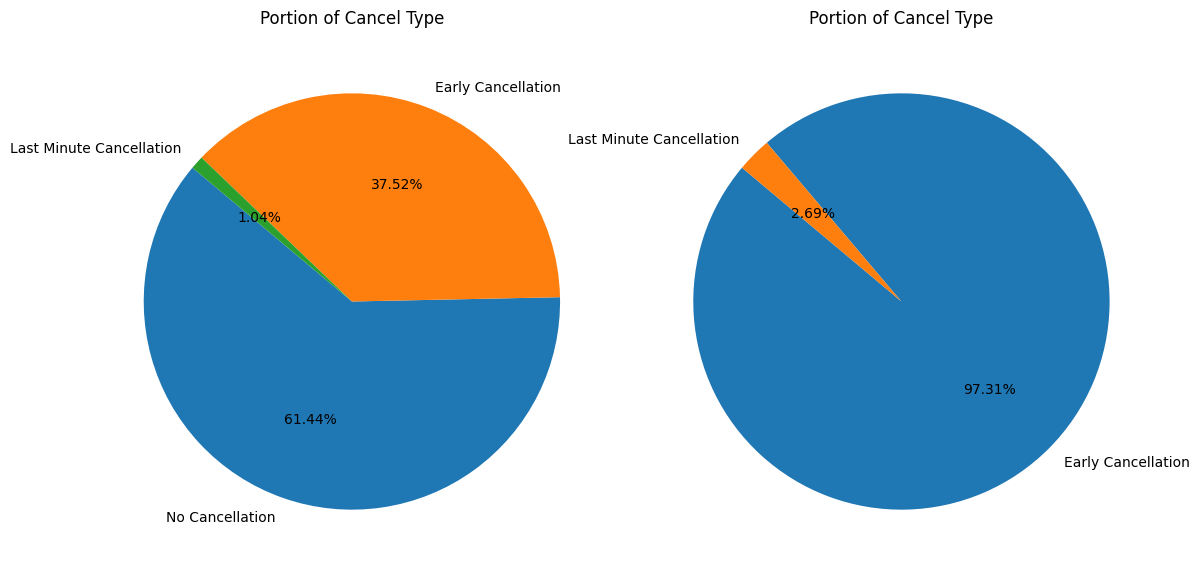

In [11]:
Counts_CancelType = Data['CancelType'].value_counts()
Counts_CancelType_only_cancel = df_Cancellation['CancelType'].value_counts()

# Plotting the pie chart of the portion of cancellation type
fig, axs = plt.subplots(1, 2, figsize=(13, 7))  # 2 rows, 2 columns
label_index = ["No Cancellation", "Early Cancellation", "Last Minute Cancellation"]
axs[0].pie(Counts_CancelType, labels=label_index , autopct='%1.2f%%', startangle=140)
axs[0].axis('equal') 
axs[0].set_title('Portion of Cancel Type')

label_index = ["Early Cancellation", "Last Minute Cancellation"]
axs[1].pie(Counts_CancelType_only_cancel, labels=label_index , autopct='%1.2f%%', startangle=140)
axs[1].axis('equal') 
axs[1].set_title('Portion of Cancel Type')

plt.show()

#### Conclusion
Portion of last minute cnacellation are very small in both all record and cancelled part

## 

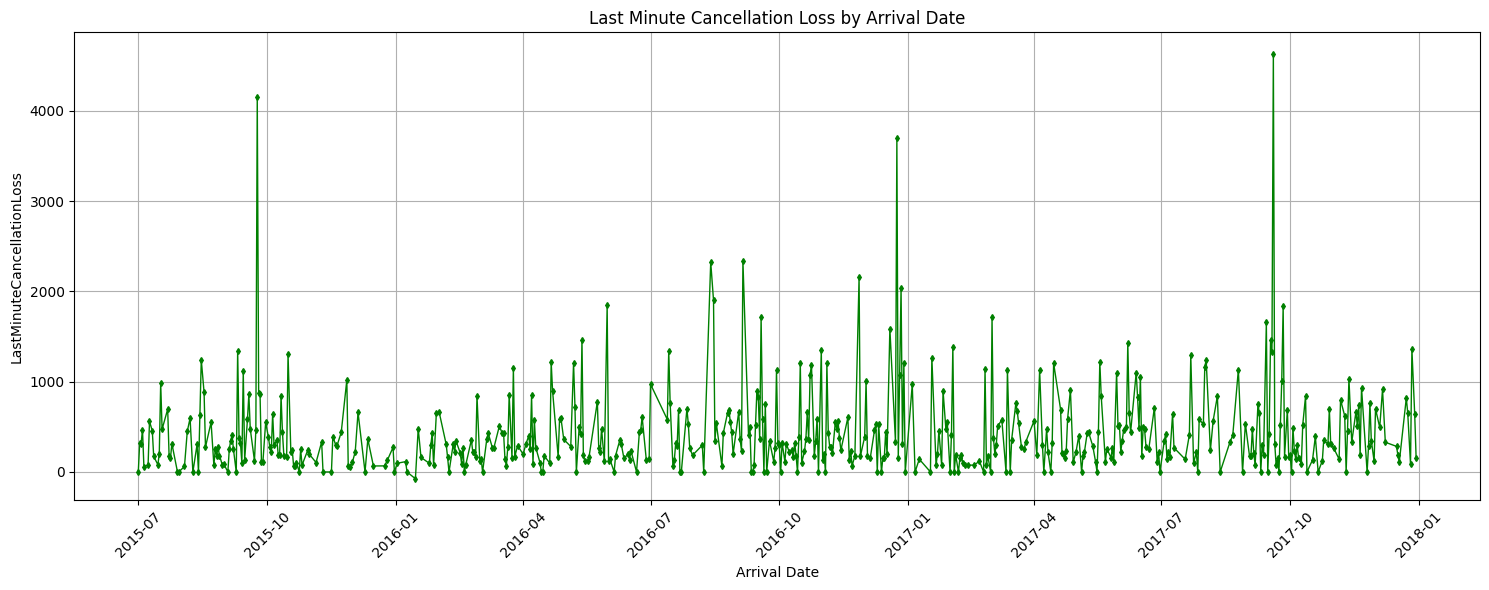

In [12]:
# Plotting Last Minute Cancellation Loss by Arrival Date
df_CancellationLoss = pd.DataFrame({
    'ArrivalDate': Data_last_min['ArrivalDate'],
    'LastMinuteCancellationLoss': Data_last_min['LastMinuteCancellationLoss']
})
df_CancellationLoss = df_CancellationLoss.groupby('ArrivalDate')['LastMinuteCancellationLoss'].sum().reset_index()
plt.figure(figsize=(15, 6))  

plt.plot(df_CancellationLoss['ArrivalDate'], df_CancellationLoss['LastMinuteCancellationLoss'], marker='d', linestyle='-', color='g',linewidth = 1,markersize = 3)

plt.title('Last Minute Cancellation Loss by Arrival Date')
plt.xlabel('Arrival Date')
plt.ylabel('LastMinuteCancellationLoss')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

#### Cancel Type V.S. ArrivalDate

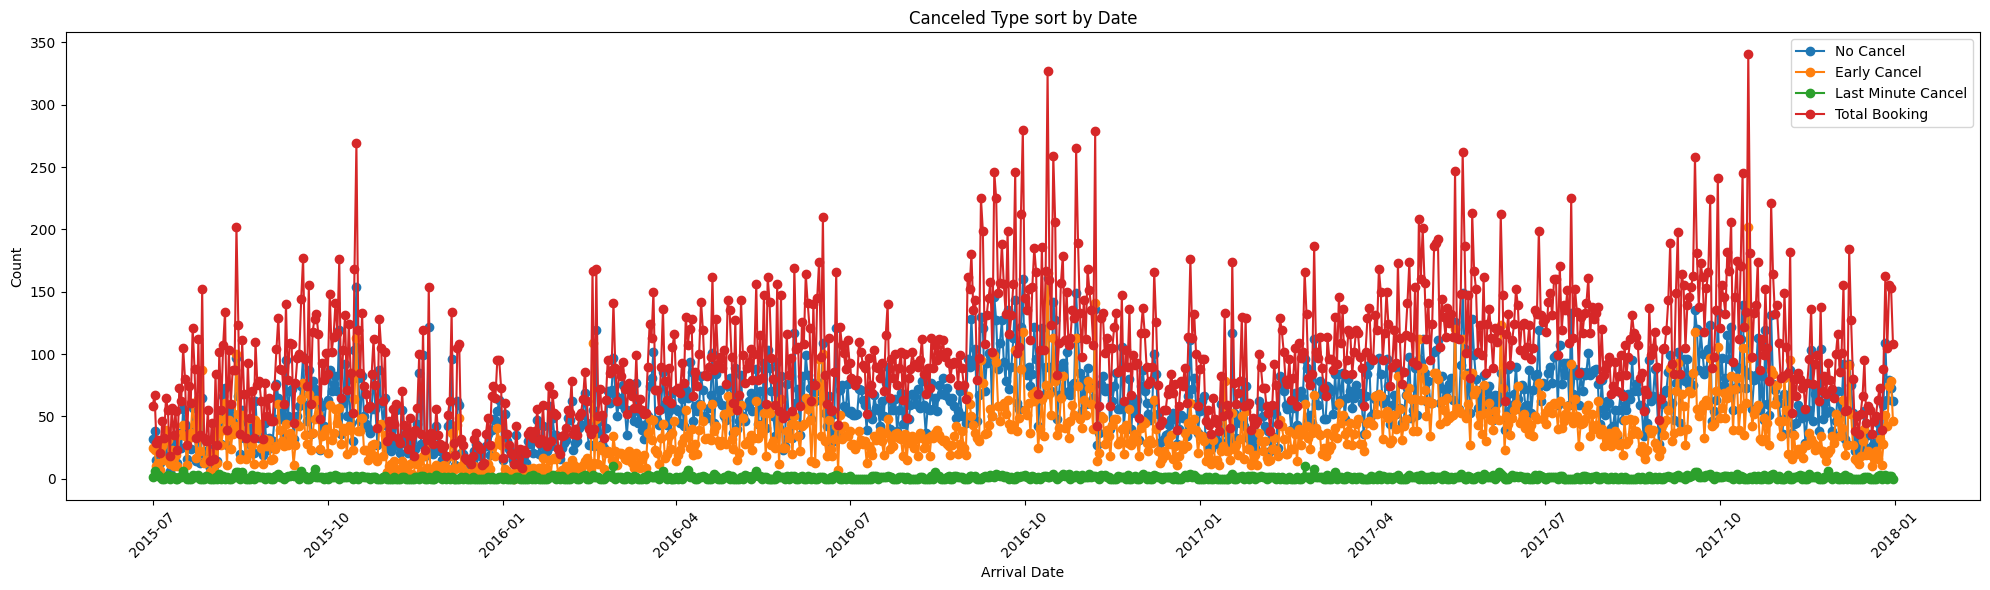

In [84]:
# Plotting Last Minute Cancellation Loss by Arrival Date
df_CancelType = pd.DataFrame({
    'ArrivalDate': Data['ArrivalDate'],
    'CancelType': Data['CancelType']
})
df_CancelType = df_CancelType = df_CancelType.groupby(['ArrivalDate', 'CancelType']).size().unstack(fill_value=0).reset_index()
df_CancelType =df_CancelType.rename(columns={0:"No Cancel",1:"Early Cancel", 2:"Last Minute Cancel"})
#add a column, Total
df_CancelType['Total Booking'] = df_CancelType.apply(lambda row: row['No Cancel'] + row['Early Cancel'] + row['Last Minute Cancel'], axis=1)


plt.figure(figsize=(20, 6))  # Set the figure size (optional)
for cancel_value in df_CancelType.columns[1:]:  # Skip the first column ('ArrivalDate')
    plt.plot(df_CancelType['ArrivalDate'], df_CancelType[cancel_value], marker='o', label=cancel_value)
    
plt.title('Canceled Type sort by Date')  
plt.xlabel('Arrival Date') 
plt.ylabel('Count')  
plt.xticks(rotation=45)
plt.tight_layout() 
plt.legend() 
plt.show()

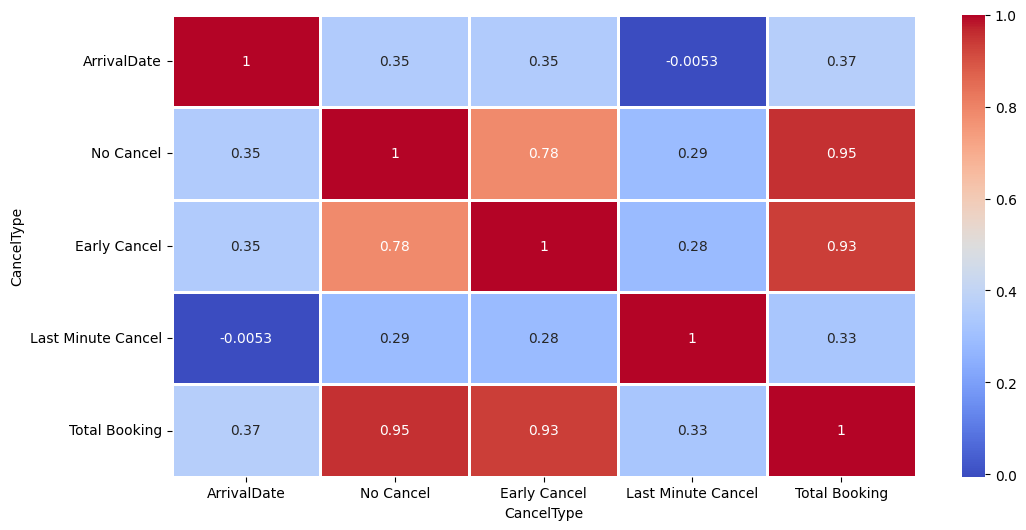

In [85]:
CancelType_Corr = df_CancelType.corr()
plt.figure(figsize=(12, 6))
sb.heatmap(CancelType_Corr , annot=True, cmap='coolwarm', linewidths=1)
plt.show()

#### Conclusion
Booking Amount has high and positive correlation with early cancel 

df_Cancellation

In [107]:
df_ADR_CType = Data[['AverageDailyRate','CancelType']]
df_ADR_CType.describe()


,AverageDailyRate,CancelType
count,90051.000000,90051.000000
mean,105.288380,0.395976
std,40.529113,0.509829
min,0.000000,0.000000
25%,78.740000,0.000000
50%,99.560000,0.000000
75%,125.110000,1.000000
max,364.960000,2.000000


/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_6425/2990897607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ADR_CType['RateCategory'] = pd.cut(df_ADR_CType['AverageDailyRate'], bins=bin_edges, labels=['Low', 'Medium', 'High', 'Very High'])
/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_6425/2990897607.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_ADR_CType.groupby(['RateCategory', 'CancelType']).size()


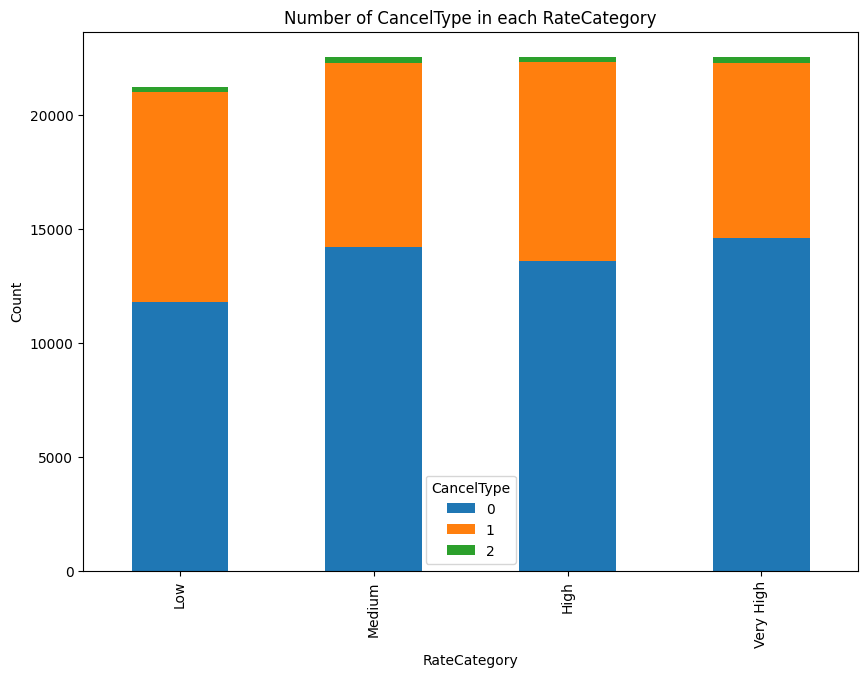

In [108]:
# Define custom bin edges
bin_edges = [0, 78.74, 99.56, 125.11, 364.96]  # Adjust these values based on your data's distribution

# Categorize 'AverageDailyRate' with custom bins
df_ADR_CType['RateCategory'] = pd.cut(df_ADR_CType['AverageDailyRate'], bins=bin_edges, labels=['Low', 'Medium', 'High', 'Very High'])

#df_ADR_CType = df_ADR_CType[df_ADR_CType["CancelType"]!=0]
# Assuming df is your DataFrame with the structure described

# Step 1: Group by 'RateCategory' and 'CancelType' and get the count
grouped = df_ADR_CType.groupby(['RateCategory', 'CancelType']).size()

# Step 2: Unstack the 'CancelType' to create a DataFrame suitable for a stacked bar chart
unstacked = grouped.unstack(level='CancelType').fillna(0)

# Step 3: Plot the stacked bar chart
unstacked.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('RateCategory')
plt.ylabel('Count')
plt.title('Number of CancelType in each RateCategory')

# Show the legend
plt.legend(title='CancelType')

# Display the plot
plt.show()


/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_6425/3899290612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ADR_CType['RateCategory'] = pd.cut(df_ADR_CType['AverageDailyRate'], bins=bin_edges, labels=['Low', 'Medium', 'High', 'Very High'])
/var/folders/t_/t17z84q161x8dcgl_1nslzxr0000gn/T/ipykernel_6425/3899290612.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_ADR_CType.groupby(['RateCategory', 'CancelType']).size()


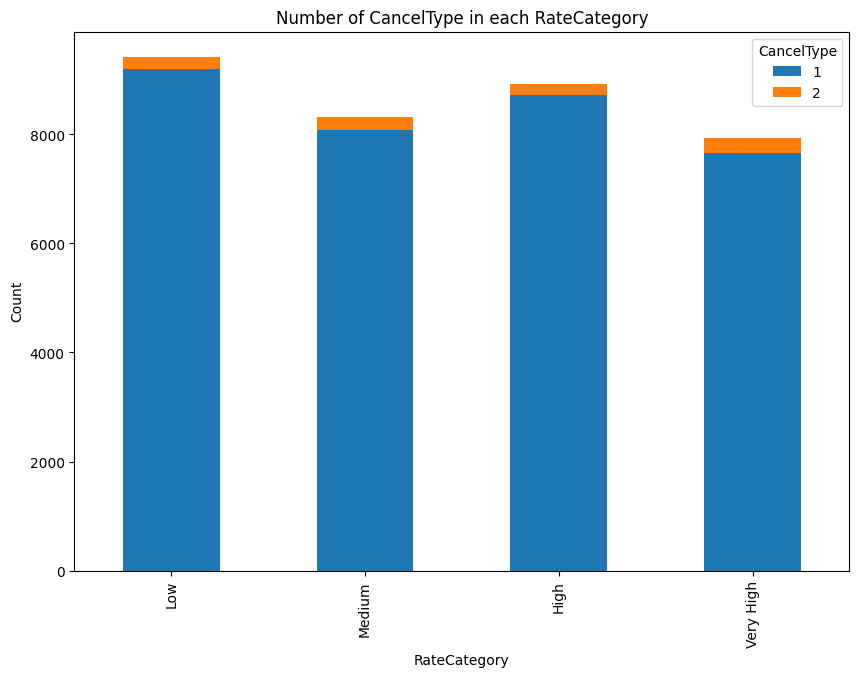

In [112]:
# Define custom bin edges
bin_edges = [0, 78.74, 99.56, 125.11, 364.96]  # Adjust these values based on your data's distribution

# Categorize 'AverageDailyRate' with custom bins
df_ADR_CType['RateCategory'] = pd.cut(df_ADR_CType['AverageDailyRate'], bins=bin_edges, labels=['Low', 'Medium', 'High', 'Very High'])

df_ADR_CType = df_ADR_CType[df_ADR_CType["CancelType"]!=0]
# Assuming df is your DataFrame with the structure described

# Step 1: Group by 'RateCategory' and 'CancelType' and get the count
grouped = df_ADR_CType.groupby(['RateCategory', 'CancelType']).size()

# Step 2: Unstack the 'CancelType' to create a DataFrame suitable for a stacked bar chart
unstacked = grouped.unstack(level='CancelType').fillna(0)

# Step 3: Plot the stacked bar chart
unstacked.plot(kind='bar', stacked=True, figsize=(10, 7))

# Add labels and title
plt.xlabel('RateCategory')
plt.ylabel('Count')
plt.title('Number of CancelType in each RateCategory')

# Show the legend
plt.legend(title='CancelType')

# Display the plot
plt.show()

#### Conclusion

In [102]:
df_ADR_CType

,AverageDailyRate,CancelType,RateCategory
0,78.49,0,Low
1,113.86,0,High
2,94.51,1,Medium
3,124.99,1,High
4,129.25,0,Very High
...,...,...,...
94359,190.87,0,Very High
94360,171.88,1,Very High
94361,88.68,0,Medium
94362,72.41,0,Low


### Preprocessing
1. one-hot encoding  
    1.drop a column

### Classification Model
1. normalization
2. Multicollinearly
3. data balancing

## Issue 1

In [11]:
#Weird-->Cancel after the arrivaldate
Data_last_min_weird = Data_last_min[Data_last_min['days_difference']<0]
Data_last_min_weird

#Record of Customer that not showing up
Data_no_show = Data[Data['ReservationStatus'] == 'No-Show']
Data_no_show
#Weird!!!!
#No-show record early than ArrivalDate
Data_no_show_weird = Data_no_show[Data_no_show['days_difference'] > 0]
Data_no_show_weird

,ArrivalDate,ArrivalWeekNumber,AssignedRoom,AverageDailyRate,BookingChanges,BookingCompany,BookingDistributionChannel,BookingMeal,BookingParking,Country,...,RepeatedGuest,ReservationStatus,ReservationStatusDate,ReservedRoom,StaysInWeekendNights,StaysInWeekNights,TotalOfSpecialRequests,TravelAgent,days_difference,CancelType
18,2015-12-20,51,A,72.66,0,NaN,TA/TO,SC,0.0,BRA,...,0,No-Show,2015-11-18,A,2,1,0,7.0,32,0
96,2016-03-18,11,D,128.63,0,NaN,TA/TO,BB,0.0,LUX,...,0,No-Show,2016-02-17,D,1,4,1,9.0,30,0
136,2016-06-27,26,A,124.46,0,NaN,TA/TO,BB,0.0,PRT,...,0,No-Show,2016-06-14,A,0,1,0,9.0,13,0
294,2016-10-28,43,A,118.81,0,NaN,TA/TO,SC,0.0,DEU,...,0,No-Show,2016-10-13,A,0,1,3,9.0,15,0
316,2015-10-14,42,A,101.88,0,NaN,Direct,BB,0.0,PRT,...,0,No-Show,2015-10-13,A,2,0,0,14.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93803,2017-11-29,48,A,124.87,0,NaN,TA/TO,BB,0.0,NLD,...,0,No-Show,2017-10-16,A,0,1,2,9.0,44,0
93922,2017-11-03,44,A,110.60,0,219.0,Corporate,BB,0.0,PRT,...,1,No-Show,2017-09-09,A,0,1,0,NaN,55,0
94083,2017-11-21,47,D,103.76,0,NaN,TA/TO,BB,0.0,NaN,...,0,No-Show,2017-10-26,D,1,1,0,9.0,26,0
94163,2017-11-04,44,A,90.18,0,NaN,TA/TO,HB,0.0,PRT,...,0,No-Show,2017-10-20,A,0,2,0,6.0,15,0


In [111]:
Data.columns

Index(['ArrivalDate', 'ArrivalWeekNumber', 'AssignedRoom', 'AverageDailyRate',
       'BookingChanges', 'BookingCompany', 'BookingDistributionChannel',
       'BookingMeal', 'BookingParking', 'Country', 'CustomerType',
       'DaysInWaitingList', 'DepositType', 'LeadTime', 'MarketSegment',
       'NumberOfAdult', 'NumberOfBabies', 'NumberOfChildren',
       'PreviousBookingsNotCanceled', 'PreviousCancellations', 'RepeatedGuest',
       'ReservationStatus', 'ReservationStatusDate', 'ReservedRoom',
       'StaysInWeekendNights', 'StaysInWeekNights', 'TotalOfSpecialRequests',
       'TravelAgent', 'days_difference', 'CancelType'],
      dtype='object')